In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import sys

from genSymbolImg import genSymbolImg
import tools as tl
import string

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
print(sys.version)
print(np.__version__)
print(cv2.__version__)

3.8.5 (default, Sep  4 2020, 07:30:14) 
[GCC 7.3.0]
1.19.2
4.5.1


## Generate Data

In [3]:
def generateData(vis = False):
    chars = string.ascii_uppercase + string.digits
    # chars = string.digits
    font = np.arange(0, 6, 1) #randint(0, 5)
    # size = np.arange(2.5, 4, 0.5) #uniform(2.5, 3.5)
    line_size = np.arange(1, 4, 1) #randint(1, 3)
    blur = np.arange(0, 2, 1) #randint(0, 1)
    kw = np.arange(1, 9, 2) #randint(3, 7)
    kh = np.arange(1, 9, 2) #randint(3, 7)

    generatedImgs = []
    rows = []

    for c in chars:
        print("Generating - ", c)
        row = []
        for f in font:
            for l in line_size:
                # for b in blur:
                for i in kw:
                    for j in kh:
                        img, _ = genSymbolImg(c, f, l, 1, i, j)
                        # _, croped = segmentSymbolsByContours(img)
                        resized = cv2.resize(img, (30,40))
                        row.append(resized)

                        # cv2.imshow("W", resized)
                        # k = cv2.waitKey(0)
                        # if k == 27:
                        #     exit()

        generatedImgs.append(row)
        rows.append(tl.concat_hor(row))


    print("Generation done")
    generatedVisImg = tl.concat_ver(rows)

    return generatedImgs, generatedVisImg

In [4]:
data, img_ = generateData()

Generating -  A
Generating -  B
Generating -  C
Generating -  D
Generating -  E
Generating -  F
Generating -  G
Generating -  H
Generating -  I
Generating -  J
Generating -  K
Generating -  L
Generating -  M
Generating -  N
Generating -  O
Generating -  P
Generating -  Q
Generating -  R
Generating -  S
Generating -  T
Generating -  U
Generating -  V
Generating -  W
Generating -  X
Generating -  Y
Generating -  Z
Generating -  0
Generating -  1
Generating -  2
Generating -  3
Generating -  4
Generating -  5
Generating -  6
Generating -  7
Generating -  8
Generating -  9
Generation done


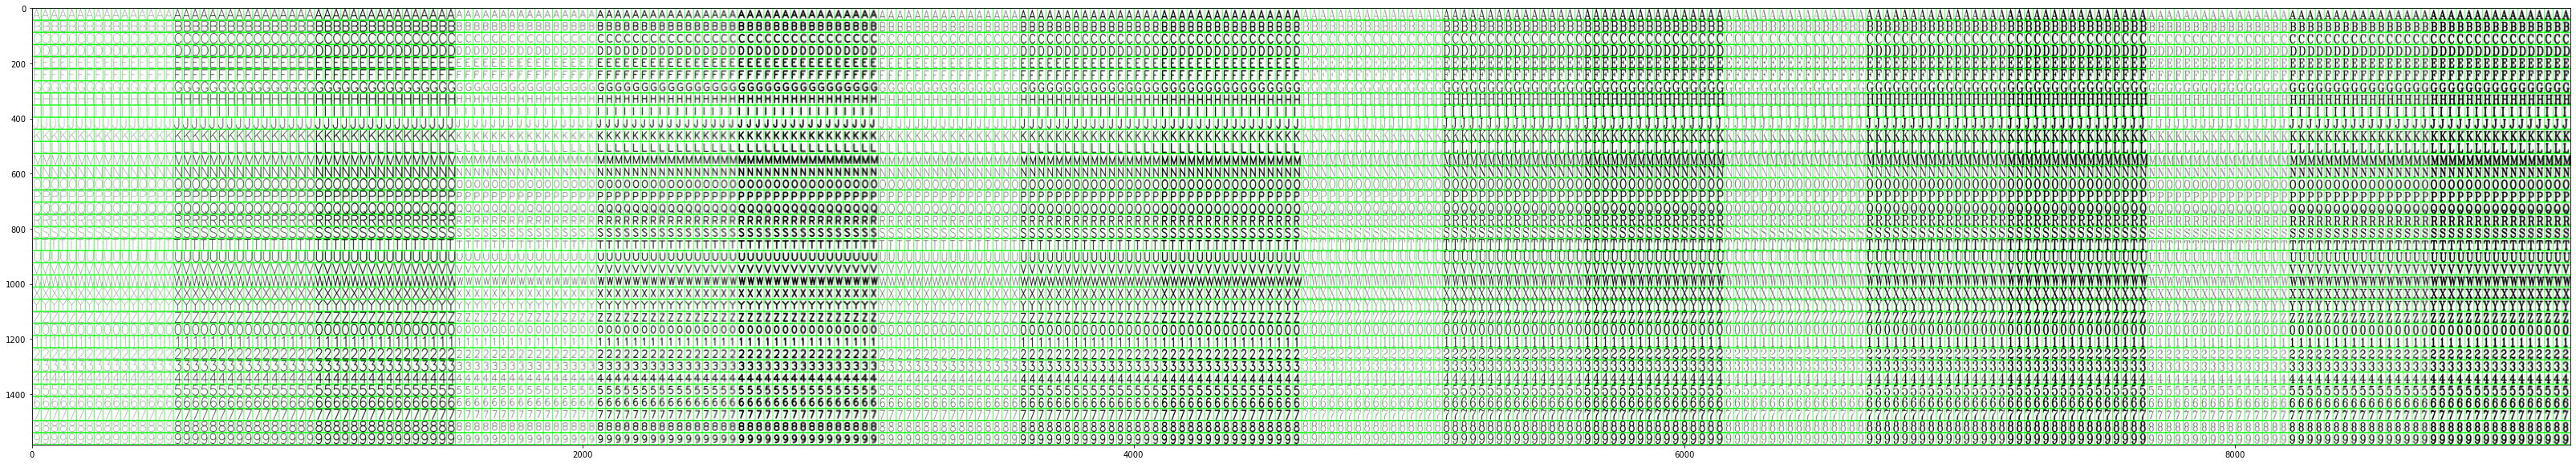

In [5]:
fig, ax = plt.subplots(figsize=(100, 10))
ax.imshow(img_, cmap='gray')
plt.show()

## Get HOG features

In [6]:
win_size = (5, 5)
nbins = 4

In [7]:
hog = cv2.HOGDescriptor(_winSize=(win_size[0], win_size[1]),
                        _blockSize=(win_size[0], win_size[1]),
                        _blockStride=(win_size[0], win_size[1]),
                        _cellSize=(win_size[0], win_size[1]),
                        _nbins=nbins, _histogramNormType = 0, _gammaCorrection = True)

In [8]:
features = []
for row in data:
    rowfd = []
    for s in row:
        rowfd.append(hog.compute(s).reshape((192)))

    features.append(rowfd)

In [9]:
print(len(features))
print(len(features[0]))
print(len(features[0][0]))

36
288
192


In [10]:
features[0][0]

array([0.        , 0.7019094 , 0.7019094 , 0.        , 0.49875313,
       0.49875313, 0.49875313, 0.49875313, 0.508583  , 0.508583  ,
       0.4679216 , 0.508583  , 0.6077358 , 0.06009089, 0.50163263,
       0.6077358 , 0.        , 0.7046156 , 0.7046156 , 0.        ,
       0.        , 0.70336133, 0.70336133, 0.        , 0.49875313,
       0.49875313, 0.49875313, 0.49875313, 0.6964543 , 0.        ,
       0.        , 0.6964543 , 0.55198723, 0.55198723, 0.28358066,
       0.55198723, 0.57070774, 0.1310688 , 0.57070774, 0.57070774,
       0.49875313, 0.49875313, 0.49875313, 0.49875313, 0.49875313,
       0.49875313, 0.49875313, 0.49875313, 0.        , 0.        ,
       0.        , 0.        , 0.5717617 , 0.5717617 , 0.11643168,
       0.5717617 , 0.560051  , 0.560051  , 0.23116219, 0.560051  ,
       0.5472976 , 0.30972657, 0.5472976 , 0.5472976 , 0.        ,
       0.7031481 , 0.7031481 , 0.        , 0.        , 0.7046156 ,
       0.7046156 , 0.        , 0.        , 0.        , 0.     

# Training

## Train - Test split

In [11]:
X = np.asarray(features).reshape(-1, 192)
X.shape

(10368, 192)

In [12]:
y = np.repeat(np.asarray([c for c in string.ascii_uppercase + string.digits]), 288)
y.shape

(10368,)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Train

In [14]:
clf = svm.SVC()
clf.fit(X, y)

SVC()

## Testing

In [15]:
for i in range(5):
  img, text = genSymbolImg()
  img_r = cv2.resize(img, (30, 40))
  fd = np.asarray(hog.compute(img_r)).reshape(-1, 192)
  pred = clf.predict(fd)

  print(f'True: {text}, Predicted: {pred}')

True: J, Predicted: ['J']
True: E, Predicted: ['E']
True: Q, Predicted: ['Q']
True: X, Predicted: ['X']
True: 5, Predicted: ['5']


In [19]:
arr = np.ones([2,2])

In [20]:
arr

array([[1., 1.],
       [1., 1.]])

In [21]:
arr.reshape(-1, 4)

array([[1., 1., 1., 1.]])